# Housing Project

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
### The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

#### Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 
 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Data understanding, preparation and EDA 
### Step 1: Reading, Understanding and Cleaning the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import os

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
#check null values and other details about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#printing null values of "poolQC" to check is null values isnt "NA"
print(data[data.PoolQC.isnull()])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [8]:
print(round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64


In [9]:
#Dropping columns with more than 80% null values
data = data.drop(data.columns[data.apply(lambda col: col.isnull().sum()/len(data) > 0.80)], axis=1)

In [10]:
print(round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False))

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
Id                0.00
Length: 77, dtype: float64


In [11]:
data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#print FireplacQu and Fireplaces to see if null value of former is because there isnt any fireplac

print(data.FireplaceQu, data.Fireplaces)

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object 0       0
1       1
2       1
3       1
4       1
       ..
1455    1
1456    2
1457    2
1458    0
1459    0
Name: Fireplaces, Length: 1460, dtype: int64


In [13]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
Id                0.00
Length: 77, dtype: float64

In [14]:
#Finding age of house, remodelling, garage and sold! 
data['YearBuilt_Old'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_Old'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_Old'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_Old'] = data.YrSold.max()-data.YrSold
data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
865,1970,1970,1973.0,2009,40,40,37.0,1
800,1997,1997,1997.0,2008,13,13,13.0,2
477,2006,2006,2006.0,2007,4,4,4.0,3
985,1950,1950,1950.0,2008,60,60,60.0,2
646,1950,1950,1950.0,2008,60,60,60.0,2
955,1946,1950,1946.0,2007,64,60,64.0,3
1272,1965,1965,1965.0,2006,45,45,45.0,4
264,1925,2004,1965.0,2008,85,6,45.0,2
717,1973,2000,1973.0,2008,37,10,37.0,2
490,1976,1976,1976.0,2008,34,34,34.0,2


In [15]:
#dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold' columns.
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Inputing null values according to the data dictionary and domain understanding
Imputing GarageYrBlt_Old with -1 as these house donot have garage
& Imputing MasVnrArea with the median value of the column.

In [16]:
data.MasVnrType.fillna('None',inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.median(),inplace=True)
data.BsmtQual.fillna('NA',inplace=True)
data.BsmtCond.fillna('NA',inplace=True)
data.BsmtExposure.fillna('No',inplace=True)
data.BsmtFinType1.fillna('NA',inplace=True)
data.BsmtFinType2.fillna('NA',inplace=True)
data.GarageType.fillna('NA',inplace=True)
data.GarageYrBlt_Old.fillna(-1,inplace=True)
data.GarageFinish.fillna('NA',inplace=True)
data.GarageQual.fillna('NA',inplace=True)
data.GarageCond.fillna('NA',inplace=True)

In [17]:
#EDA for null values of LotFrontage
print('Mean: ', data['LotFrontage'].mean(), "Mode: ", data['LotFrontage'].mode(), 'Median: ', data['LotFrontage'].median())

Mean:  70.04995836802665 Mode:  0    60.0
dtype: float64 Median:  69.0


In [18]:
#since the lotFrontage is not a categorical data, and mean as well as median as very similar, We can impute either
data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

In [19]:
#EDA for FireplaceQu 
data['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
data['Fireplaces'].astype('category').value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [21]:
data['BsmtExposure'].astype('category').value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [22]:
#notice that there are 690 null values in FireplaceQu, hence replacing nullvalues Null to TA
data.FireplaceQu.fillna('NA',inplace=True)

In [23]:
#EDA for null values of Electrical
data['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [24]:
#replacing null values of Electrical with the mode value, which is SBrkr
data.Electrical.fillna('SBrkr',inplace=True)

In [25]:
# Changing GarageYrBlt_old, LotFrontage, MasVnrArea from float to int
data['GarageYrBlt_Old'] = data['GarageYrBlt_Old'].astype(int) 
data['LotFrontage'] = data['LotFrontage'].astype(int) 
data['MasVnrArea'] = data['GarageYrBlt_Old'].astype(int) 

In [26]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,WD,Normal,208500,7,7,7,2
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,WD,Normal,181500,34,34,34,3
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,WD,Normal,223500,9,8,9,2
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,WD,Abnorml,140000,95,40,12,4
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,WD,Normal,250000,10,10,10,2
5,6,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,700,10,WD,Normal,143000,17,15,17,1
6,7,20,RL,75,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,8,WD,Normal,307000,6,5,6,3
7,8,60,RL,69,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,350,11,WD,Normal,200000,37,37,37,1
8,9,50,RM,51,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,WD,Abnorml,129900,79,60,79,2
9,10,190,RL,50,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,1,WD,Normal,118000,71,60,71,2


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1460 non-null   int64 
 1   MSSubClass        1460 non-null   int64 
 2   MSZoning          1460 non-null   object
 3   LotFrontage       1460 non-null   int64 
 4   LotArea           1460 non-null   int64 
 5   Street            1460 non-null   object
 6   LotShape          1460 non-null   object
 7   LandContour       1460 non-null   object
 8   Utilities         1460 non-null   object
 9   LotConfig         1460 non-null   object
 10  LandSlope         1460 non-null   object
 11  Neighborhood      1460 non-null   object
 12  Condition1        1460 non-null   object
 13  Condition2        1460 non-null   object
 14  BldgType          1460 non-null   object
 15  HouseStyle        1460 non-null   object
 16  OverallQual       1460 non-null   int64 
 17  OverallCond   

In [28]:
data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,29.691096,443.639726,46.549315,567.240411,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,25.121824,456.098091,161.319273,441.866955,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,7.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,25.500000,383.500000,0.000000,477.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,48.000000,712.250000,0.000000,808.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,92.820000,1572.410000,830.380000,1797.050000,...,168.000000,268.050000,0.000000,700.000000,12.000000,442567.010000,110.820000,60.000000,92.820000,4.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,110.000000,5644.000000,1474.000000,2336.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


### All the nulll values are handled.

#### Deeper Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

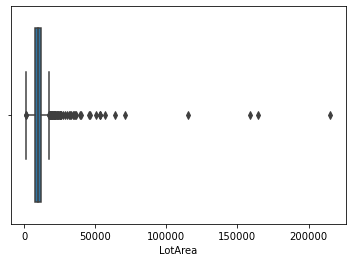

In [29]:
# LotArea
sns.boxplot(data['LotArea'])
plt.show()

In [30]:
data['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [31]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [33]:
#Utilities and Street has very less variance, hence dropping the column
data = data.drop(['Street','Utilities'],axis='columns')

In [34]:
#Dropping ID column as it holds no importance in the analysis
data = data.drop(['Id'],axis='columns')

In [35]:
data[list(data.dtypes[data.dtypes!='object'].index)].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,29.691096,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,22.027677,9981.264932,1.382997,1.112799,25.121824,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,7.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,25.500000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,48.000000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,110.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


### Visualising the Data

In [36]:
# all numeric (float and int) variables in the dataset
dataN = data.select_dtypes(include=['int64'])
dataN.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,65,8450,7,5,7,706,0,150,856,...,0,0,0,0,2,208500,7,7,7,2
1,20,80,9600,6,8,34,978,0,284,1262,...,0,0,0,0,5,181500,34,34,34,3
2,60,68,11250,7,5,9,486,0,434,920,...,0,0,0,0,9,223500,9,8,9,2
3,70,60,9550,7,5,12,216,0,540,756,...,0,0,0,0,2,140000,95,40,12,4
4,60,84,14260,8,5,10,655,0,490,1145,...,0,0,0,0,12,250000,10,10,10,2


In [37]:
list(dataN.columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Old',
 'YearRemodAdd_Old',
 'GarageYrBlt_Old',
 'YrSold_Old']

In [38]:
# paiwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(dataN)
#plt.show()

In [39]:
# correlation matrix
#cor = dataN.corr()
#cor

In [40]:
# plotting correlations on a heatmap

# figure size
#plt.figure(figsize=(30,15))

# heatmap
#sns.heatmap(cor, cmap="YlGnBu", annot=True)
#plt.show()

GarageYrBit_Old and MasVnrArea is highly corelated, followed by TotRmsAbsGrd-GrLivArea, TotalBsmtSf-1stFlrSf, SalePrice-OverallQual, GrLivArea-SalePrice.
##### Thus, while building the model, we'll have to pay attention to multicollinearity

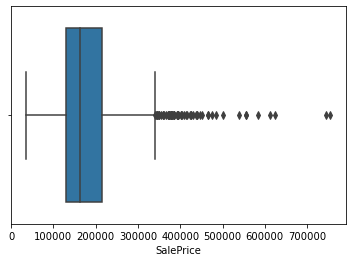

In [41]:
# LotArea
sns.boxplot(data['SalePrice'])
plt.show()

#### Handling Outliers

In [42]:
# handling the outliers, taking the lower and upper quantile as 0.25 & 0.99 respectively

num_col = list(data.dtypes[data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

data = drop_outliers(data)

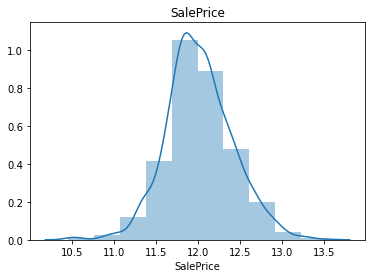

In [43]:
#Scaling SalePrice using log
data['SalePrice'] = np.log1p(data['SalePrice'])

plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

In [44]:
data.shape

(1441, 74)

#### Handling ordinal values according to the data dictionary

In [45]:
data['LandSlope'] = data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
data['ExterQual'] = data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType2'] = data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['HeatingQC'] = data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['CentralAir'] = data.CentralAir.map({'N':0,'Y':1})
data['KitchenQual'] = data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['GarageFinish'] = data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['ExterCond'] = data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['LotShape'] = data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [46]:
data['FireplaceQu'] = data.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [47]:
print(data.FireplaceQu, data.Fireplaces)

0       0
1       3
2       3
3       4
4       3
       ..
1454    0
1455    3
1456    3
1458    0
1459    0
Name: FireplaceQu, Length: 1441, dtype: int64 0       0
1       1
2       1
3       1
4       1
       ..
1454    0
1455    1
1456    2
1458    0
1459    0
Name: Fireplaces, Length: 1441, dtype: int64


In [48]:
#Looking into the new mapped ordinal columns
data[['LandSlope','ExterQual','LotShape','BsmtQual','BsmtCond','HeatingQC','CentralAir', 'BsmtExposure','BsmtFinType1','BsmtFinType2',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond', 'FireplaceQu']].head()

,LandSlope,ExterQual,LotShape,BsmtQual,BsmtCond,HeatingQC,CentralAir,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,FireplaceQu
0,0,3,3,4,3,4,1,1,6,1,3,2,3,3,2,0
1,0,2,3,4,3,4,1,4,5,1,2,2,3,3,2,3
2,0,3,0,4,3,4,1,2,6,1,3,2,3,3,2,3
3,0,2,0,3,4,3,1,1,5,1,3,1,3,3,2,4
4,0,3,0,4,3,4,1,3,6,1,3,2,3,3,2,3


### Data preparation

In [49]:
dummy_col = pd.get_dummies(data[['MSZoning','LandContour','MasVnrType','Foundation',
             'Heating','Electrical','Functional','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd', 'GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

data = pd.concat([data,dummy_col],axis='columns')

data = data.drop(['MSZoning','LandContour','LotConfig','MasVnrType','Foundation',
             'Heating', 'GarageType','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','PavedDrive','Electrical','Functional','SaleType','SaleCondition'],axis='columns')

In [50]:
data.shape

(1441, 197)

In [51]:
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,3,0,7,5,7,3,2,...,0,0,0,0,1,0,0,0,1,0
1,20,80,9600,3,0,6,8,34,2,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68,11250,0,0,7,5,9,3,2,...,0,0,0,0,1,0,0,0,1,0
3,70,60,9550,0,0,7,5,12,2,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84,14260,0,0,8,5,10,3,2,...,0,0,0,0,1,0,0,0,1,0


In [52]:
#checking if any column is remaining to be converted to dummy Var.
data[list(data.dtypes[data.dtypes=='object'].index)].head()

""
0
1
2
3
4


### Data Spliting

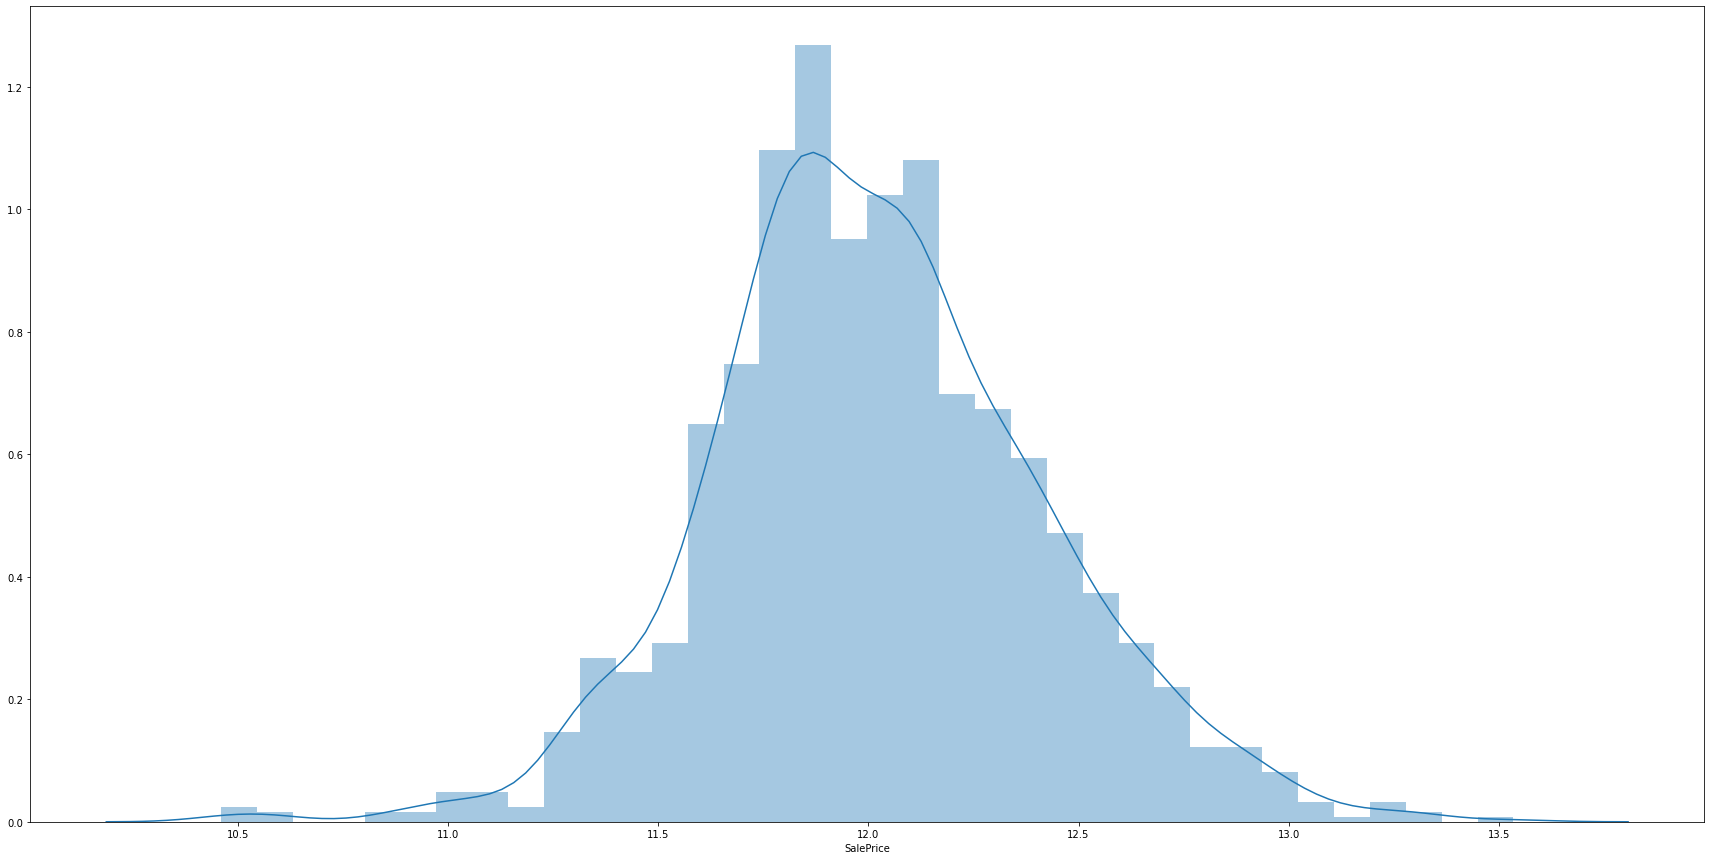

In [53]:
# Distplot before splitting and scaling
plt.figure(figsize=(30,15))
sns.distplot(data.SalePrice)
plt.show()

In [54]:
# Putting all feature variable to X

X = data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,3,0,7,5,7,3,2,...,0,0,0,0,1,0,0,0,1,0
1,20,80,9600,3,0,6,8,34,2,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68,11250,0,0,7,5,9,3,2,...,0,0,0,0,1,0,0,0,1,0
3,70,60,9550,0,0,7,5,12,2,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84,14260,0,0,8,5,10,3,2,...,0,0,0,0,1,0,0,0,1,0


In [55]:
# Putting response variable to y

y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [56]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=196)

In [57]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Step 5: Recursive feature elimination (RFE)¶

    Since there are around 196 features, we will use RFE to get the best 50 features out of the 111 features and use the new
    features for further analysis

In [58]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [59]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 20 features selected using RFE to a dataframe and view them

temp_data = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_data = temp_data.loc[temp_data['rfe_support'] == True]
temp_data.reset_index(drop=True, inplace=True)

temp_data

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,Fireplaces,True,1
7,GarageArea,True,1
8,YearBuilt_Old,True,1
9,MSZoning_FV,True,1


In [60]:
# Assign the 20 columns to X_train_rfe

X_train_rfe = X_train[col]

In [61]:
# Associate the new 20 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,SaleCondition_Partial,40.09
18,SaleType_New,39.95
11,MSZoning_RL,25.49
14,MasVnrType_None,25.17
13,MasVnrType_BrkFace,22.84
12,MSZoning_RM,19.78
15,MasVnrType_Stone,9.47
9,MSZoning_FV,7.56
8,YearBuilt_Old,3.29
1,OverallQual,3.16


In [63]:
#dropping GrLivArea as it has high VIF value.
X_train=X_train.drop('GrLivArea', axis=1)


In [64]:
X_test=X_test.drop('GrLivArea', axis=1)

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,SaleCondition_Partial,40.06
17,SaleType_New,39.94
10,MSZoning_RL,25.49
13,MasVnrType_None,25.16
12,MasVnrType_BrkFace,22.84
11,MSZoning_RM,19.78
14,MasVnrType_Stone,9.46
8,MSZoning_FV,7.56
7,YearBuilt_Old,3.07
1,OverallQual,2.71


In [66]:
#dropping TotalBsmtSF as it has high VIF value.
X_train=X_train.drop('TotalBsmtSF', axis=1)


In [67]:
X_test=X_test.drop('TotalBsmtSF', axis=1)

In [68]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [69]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 20 features selected using RFE to a dataframe and view them

temp_data = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_data = temp_data.loc[temp_data['rfe_support'] == True]
temp_data.reset_index(drop=True, inplace=True)

temp_data

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,Fireplaces,True,1
5,GarageArea,True,1
6,YearBuilt_Old,True,1
7,MSZoning_FV,True,1
8,MSZoning_RH,True,1
9,MSZoning_RL,True,1


In [70]:
# Assign the 15 columns to X_train_rfe

X_train_rfe = X_train[col]

In [71]:
# Associate the new 15 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [72]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,SaleType_New,39.87
14,SaleCondition_Partial,39.76
9,MSZoning_RL,25.47
10,MSZoning_RM,19.76
7,MSZoning_FV,7.52
6,YearBuilt_Old,2.90
8,MSZoning_RH,2.43
1,OverallQual,2.41
11,Foundation_PConc,2.08
5,GarageArea,1.78


In [73]:
X_train.shape

(1008, 15)

In [74]:
X_test.shape

(433, 15)

### Attempting Ridge model

In [75]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# display the mean scores

ridge_cv_resultsHousing = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_resultsHousing = ridge_cv_resultsHousing[ridge_cv_resultsHousing['param_alpha']<=500]
ridge_cv_resultsHousing[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.114586,-0.118093,1
23,50,-0.114948,-0.118126,2
21,10,-0.114488,-0.118161,3
20,9,-0.114476,-0.118173,4
19,8,-0.114463,-0.118187,5
18,7,-0.114451,-0.118202,6
17,6,-0.114442,-0.118220,7
16,5,-0.114433,-0.118241,8
15,4,-0.114421,-0.118266,9
14,3,-0.114407,-0.118296,10


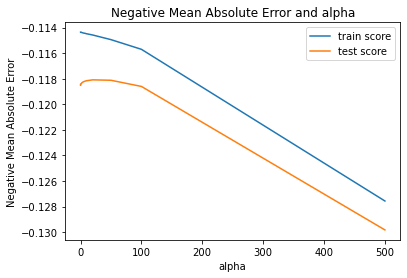

In [77]:
# plotting mean test and train scoes with alpha 

ridge_cv_resultsHousing['param_alpha'] = ridge_cv_resultsHousing['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_resultsHousing['param_alpha'], ridge_cv_resultsHousing['mean_train_score'])
plt.plot(ridge_cv_resultsHousing['param_alpha'], ridge_cv_resultsHousing['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [78]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [118]:
# check the coefficient values with lambda = 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.04802611,  0.18114658,  0.05210736,  0.05226132,  0.05284597,
        0.08181054, -0.02863183,  0.0406683 ,  0.02791043,  0.08768376,
        0.03639583,  0.0557014 , -0.02861707,  0.03727107, -0.02144354])

In [119]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.029090482378625566

In [120]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.048,
 'OverallQual': 0.1811,
 'OverallCond': 0.0521,
 'BsmtFinSF1': 0.0523,
 'Fireplaces': 0.0528,
 'GarageArea': 0.0818,
 'YearBuilt_Old': -0.0286,
 'MSZoning_FV': 0.0407,
 'MSZoning_RH': 0.0279,
 'MSZoning_RL': 0.0877,
 'MSZoning_RM': 0.0364,
 'Foundation_PConc': 0.0557,
 'Condition2_PosN': -0.0286,
 'SaleType_New': 0.0373,
 'SaleCondition_Partial': -0.0214}

In [121]:
#Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

ridge_temp = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_temp = ridge_temp.loc[ridge_temp['rfe_support'] == True]
ridge_temp.reset_index(drop=True, inplace=True)

ridge_temp['Coefficient'] = ridge_temp['Features'].apply(find)
ridge_temp = ridge_temp.sort_values(by=['Coefficient'], ascending=False)
ridge_temp = ridge_temp.head(10)
ridge_temp

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.1811
9,MSZoning_RL,True,1,0.0877
5,GarageArea,True,1,0.0818
4,Fireplaces,True,1,0.0528
3,BsmtFinSF1,True,1,0.0523
2,OverallCond,True,1,0.0521
0,LotArea,True,1,0.0480
7,MSZoning_FV,True,1,0.0407
10,MSZoning_RM,True,1,0.0364
8,MSZoning_RH,True,1,0.0279


### Plotting Features

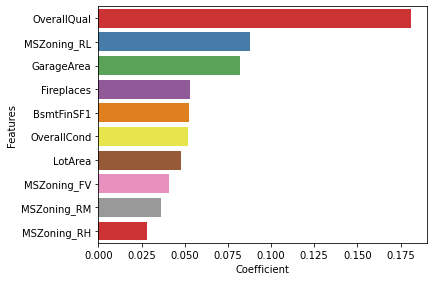

In [122]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_temp)
plt.show()

### The above graph displays the top 10 variables, based on the Ridge Regression model that are significant in predicting the price of a house. 

In [123]:
y_pred_train=ridge.predict(X_train)
print("Final Train r-squared: ", metrics.r2_score(y_train, y_pred_train))

y_pred = ridge.predict(X_test)
print("Final Test r-squared: ", metrics.r2_score(y_test, y_pred))

Final Train r-squared:  0.8506996141050609
Final Test r-squared:  0.8179030210026446


## Lasso Regression Model

In [85]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004851,0.001952,0.002011,0.000415,0.0001,{'alpha': 0.0001},-0.125051,-0.111216,-0.123863,-0.116642,...,-0.118538,0.005193,9,-0.112895,-0.115583,-0.113017,-0.115462,-0.114980,-0.114387,0.001187
1,0.004307,0.001396,0.001974,0.000405,0.0002,{'alpha': 0.0002},-0.124880,-0.111205,-0.123594,-0.117026,...,-0.118526,0.005073,8,-0.112888,-0.115576,-0.113061,-0.115469,-0.114983,-0.114395,0.001179
2,0.003419,0.000520,0.001859,0.000542,0.0003,{'alpha': 0.0003},-0.124710,-0.111194,-0.123327,-0.117409,...,-0.118539,0.004948,10,-0.112881,-0.115592,-0.113132,-0.115477,-0.114987,-0.114414,0.001170
3,0.003623,0.000962,0.001999,0.000407,0.0004,{'alpha': 0.0004},-0.124540,-0.111183,-0.123060,-0.117586,...,-0.118516,0.004835,7,-0.112877,-0.115617,-0.113212,-0.115476,-0.114991,-0.114434,0.001159
4,0.015204,0.022292,0.002173,0.000632,0.0005,{'alpha': 0.0005},-0.124371,-0.111173,-0.122797,-0.117613,...,-0.118463,0.004732,5,-0.112873,-0.115644,-0.113292,-0.115468,-0.114996,-0.114454,0.001148


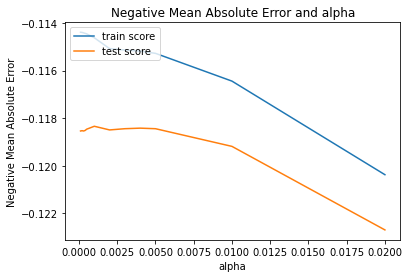

In [88]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
# display the mean scores

lasso_cv_resultsHousing = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_resultsHousing[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.001,-0.114620,-0.118340,1
8,0.004,-0.115181,-0.118419,2
7,0.003,-0.115137,-0.118442,3
9,0.005,-0.115274,-0.118442,4
4,0.0005,-0.114454,-0.118463,5
6,0.002,-0.115076,-0.118494,6
3,0.0004,-0.114434,-0.118516,7
1,0.0002,-0.114395,-0.118526,8
0,0.0001,-0.114387,-0.118538,9
2,0.0003,-0.114414,-0.118539,10


In [90]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [124]:
# check the coefficient values with lambda = 0.0004

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.04704287,  0.18739673,  0.05059906,  0.0522034 ,  0.05099404,
        0.08159949, -0.02444992,  0.04401124,  0.02907564,  0.09501245,
        0.04137476,  0.05464312, -0.02853759,  0.01546348, -0.        ])

In [125]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.029037869006987495

In [126]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_temp = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_temp = lasso_temp[lasso_temp['Coefficient'] != 0.00]
lasso_temp.reset_index(drop=True, inplace=True)
lasso_temp

,Features,Coefficient
0,LotArea,0.0470
1,OverallQual,0.1874
2,OverallCond,0.0506
3,BsmtFinSF1,0.0522
4,Fireplaces,0.0510
5,GarageArea,0.0816
6,YearBuilt_Old,-0.0244
7,MSZoning_FV,0.0440
8,MSZoning_RH,0.0291
9,MSZoning_RL,0.0950


In [127]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.047042873415719236,
 'OverallQual': 0.18739673142545327,
 'OverallCond': 0.050599058408533105,
 'BsmtFinSF1': 0.05220340369429269,
 'Fireplaces': 0.0509940403213646,
 'GarageArea': 0.08159948574905883,
 'YearBuilt_Old': -0.024449924268952324,
 'MSZoning_FV': 0.04401124110218443,
 'MSZoning_RH': 0.02907563780971414,
 'MSZoning_RL': 0.0950124472285482,
 'MSZoning_RM': 0.04137476119840094,
 'Foundation_PConc': 0.05464312157763331,
 'Condition2_PosN': -0.028537585542200008,
 'SaleType_New': 0.015463480640092918,
 'SaleCondition_Partial': -0.0}

In [128]:
#Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

lasso_temp = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_temp = lasso_temp.loc[lasso_temp['rfe_support'] == True]
lasso_temp.reset_index(drop=True, inplace=True)

lasso_temp['Coefficient'] = lasso_temp['Features'].apply(find)
lasso_temp = lasso_temp.sort_values(by=['Coefficient'], ascending=False)
lasso_temp = lasso_temp.head(10)
lasso_temp

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.187397
9,MSZoning_RL,True,1,0.095012
5,GarageArea,True,1,0.081599
3,BsmtFinSF1,True,1,0.052203
4,Fireplaces,True,1,0.050994
2,OverallCond,True,1,0.050599
0,LotArea,True,1,0.047043
7,MSZoning_FV,True,1,0.044011
10,MSZoning_RM,True,1,0.041375
8,MSZoning_RH,True,1,0.029076


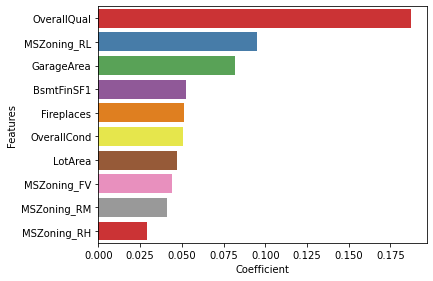

In [129]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_temp)
plt.show()

### The above graph displays the top 10 variables, based on the Lasso Regression model that are significant in predicting the price of a house. 

In [130]:
y_pred_train=lasso.predict(X_train)
print("Final Train r-squared: ", metrics.r2_score(y_train, y_pred_train))

y_pred = lasso.predict(X_test)
print("Final Test r-squared: ", metrics.r2_score(y_test, y_pred))

Final Train r-squared:  0.8506053236153143
Final Test r-squared:  0.8182323636345563


## FINAL REMARKS

### Optimal Value of Alpha for:
        Ridge Regression: 20.0
        Lasso Regression: 0.001

### R-squared values for both the models: 

#### Lasso:  
        ​ Train: 0.8506053236153143 
        ​ Test: 0.8182323636345563 
#### Ridge:  
        ​ Train: 0.8506996141050609 
        ​ Test: 0.8179030210026446 
        
### Mean-Squared Values for both the models:

    ​ Lasso: 0.029037869006987495
    ​ Ridge: 0.029090482378625566